<a href="https://colab.research.google.com/github/CubatLin/Data-Science-Project/blob/main/Quantitative%20Finance%20Research%20-%20X_1~X_69/%5BColab%5D_Quantitative_Finance_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount Drive
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Data

In [2]:
import numpy as np
import pandas as pd
train = pd.read_csv('../train_0715.csv')
eval = pd.read_csv('../eval_0715.csv')

In [3]:
train.columns

Index(['X_0', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9',
       'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18',
       'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27',
       'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36',
       'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45',
       'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54',
       'X_55', 'X_56', 'X_57', 'X_58', 'X_59', 'X_60', 'X_61', 'X_62', 'X_63',
       'X_64', 'X_65', 'X_66', 'X_67', 'X_68', 'X_69', 'Y', 'idx',
       'Diff_cdf_idx'],
      dtype='object')

In [4]:
train.head(3)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,X_40,X_41,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,Y,idx,Diff_cdf_idx
0,0.853843,-0.709693,0.142649,-0.176952,0.117582,-0.152395,1.207672,0.245734,1.924513,0.601621,-0.439250,0.582352,-0.709693,0.058878,0.228716,0.080196,0.182907,0.052213,1.419680,0.204095,1.891033,0.491307,0.284242,-0.393284,0.746444,0.706549,0.869002,1.237137,0.995521,0.993360,1.363493,-0.201711,0.704825,0.661752,0.679638,1.089863,1.315128,-0.980191,-1.059645,-0.112974,-1.157228,-0.053695,-0.300459,-0.072508,-0.434420,0.372723,0.719581,0.543409,0.170987,0.349136,1.943812,0.138223,0.555792,0.609194,0.190231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,1,0.000000,0.0
1,1.128771,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.001865,1.037051,0.440938,0.447094,0.947879,0.196005,-0.029401,0.058878,0.228716,-3.181323,0.182907,0.052213,1.209400,0.977915,0.413308,0.963050,0.099428,0.893599,0.974448,1.458270,1.283931,0.684938,0.694759,1.255584,1.133564,0.861499,1.148253,0.205993,-0.043276,0.963712,0.555411,-0.728998,-0.749459,0.734531,0.509114,0.563090,0.419955,0.419639,0.355975,0.946573,0.685234,0.814245,0.398241,0.349136,0.844309,0.576239,0.610637,0.609194,0.190231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,1,0.085146,0.0
2,0.760572,-0.029401,0.142649,-0.176952,0.117582,-0.152395,0.433292,0.068885,0.908483,1.140838,0.169367,0.254497,-0.029401,1.711484,0.228716,-4.202403,0.182907,0.052213,0.628468,0.031157,0.879010,0.331264,0.929147,0.171348,0.726897,0.381460,0.039037,-0.956034,-2.184735,-1.136086,1.092677,0.949307,0.841419,0.280544,-0.166573,-1.526949,1.058201,-0.194167,-0.548287,1.021428,0.726129,1.019066,0.755176,1.067517,0.813870,-0.265283,0.032812,0.141379,-0.565776,0.456513,0.292513,0.632463,0.638465,0.609194,0.190231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,0,0.170291,0.0


In [5]:
eval.head(3)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,X_40,X_41,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,Y,idx,Diff_cdf_idx
0,-0.163385,1.728609,0.142649,-0.176952,0.117582,-0.152395,0.367092,0.396664,-0.568763,-0.659308,-1.460349,-1.277176,1.728609,0.058878,0.228716,0.080196,0.182907,0.052213,0.560829,0.351688,-0.592410,-2.147502,-1.072024,-1.373925,1.328402,0.773860,0.354308,-0.353238,0.826510,-0.406675,-0.980651,0.298315,-0.644835,-1.040539,-0.342384,-1.055419,-1.188373,-1.468080,-1.755555,0.065633,0.380228,0.140739,0.538371,0.151821,0.545479,-0.901711,-0.777216,-0.750277,-2.998966,0.349136,-0.320419,-1.283056,3.540881,4.129956,0.151671,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.960784,0.0,0.0,0.336591,0.264297,0.315789,0.026261,1,0.000000,0.0
1,-0.055390,1.519337,0.142649,-0.176952,0.117582,-0.152395,0.625994,-0.385464,-1.628485,0.106094,0.769114,-0.539004,1.519337,0.058878,0.228716,0.080196,0.182907,0.052213,0.825359,-0.413147,-1.647954,-1.962196,-0.156601,0.694417,0.957313,0.813600,0.422047,-0.755981,0.571840,0.627638,0.461960,0.231801,-0.644835,1.068863,-1.034593,-1.362928,-1.545531,0.855117,0.790379,0.346429,0.588343,0.228561,0.722808,0.086763,0.722958,-1.428631,-1.967404,-1.813329,-0.242018,0.349136,-0.571870,0.004159,1.815301,4.129956,0.151671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.960784,0.0,0.0,0.336591,0.264297,0.315789,0.026261,1,0.085085,0.0
2,-0.163385,1.519337,0.142649,-0.176952,0.117582,-0.152395,0.423988,0.171544,-0.373376,0.901865,-0.557337,0.289089,1.519337,0.058878,0.228716,0.080196,0.182907,0.052213,0.618962,0.131545,-0.397794,-2.147502,0.795142,-0.536173,1.066405,0.629312,-0.153364,-0.107050,-0.972231,-0.220350,-1.344064,0.053433,0.529420,1.068863,-1.417589,-1.743812,1.058201,0.749375,0.648170,0.949950,0.616601,0.863635,0.839167,0.910214,0.870741,-2.323477,-2.121811,-2.128943,-0.175742,0.349136,-0.342998,0.241700,1.923077,4.129956,0.151671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.960784,0.0,0.0,0.336591,0.264297,0.315789,0.026261,1,0.170169,0.0


In [6]:
from scipy import stats
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),5) 

    return summary

In [8]:
resumetable(train.iloc[:,:30])

Dataset Shape: (1174461, 30)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,X_0,float64,0,758144,0.853843,1.128771,0.760572,19.20835
1,X_1,float64,0,348328,-0.709693,-0.029401,-0.029401,14.50212
2,X_2,float64,0,81184,0.142649,0.142649,0.142649,9.66027
3,X_3,float64,0,77071,-0.176952,-0.176952,-0.176952,9.61500
4,X_4,float64,0,67967,0.117582,0.117582,0.117582,9.51360
5,X_5,float64,0,63314,-0.152395,-0.152395,-0.152395,9.46324
6,X_6,float64,0,845458,1.207672,1.001865,0.433292,19.47572
7,X_7,float64,0,849963,0.245734,1.037051,0.068885,19.49740
8,X_8,float64,0,836277,1.924513,0.440938,0.908483,19.46585
9,X_9,float64,0,834242,0.601621,0.447094,1.140838,19.44529


In [9]:
resumetable(train.iloc[:,30:])

Dataset Shape: (1174461, 43)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,X_30,float64,0,323617,1.363493,1.133564,1.092677,14.30567
1,X_31,float64,0,339019,-0.201711,0.861499,0.949307,14.24035
2,X_32,float64,0,397357,0.704825,1.148253,0.841419,15.36682
3,X_33,float64,0,290961,0.661752,0.205993,0.280544,13.90621
4,X_34,float64,0,324304,0.679638,-0.043276,-0.166573,14.01082
5,X_35,float64,0,404770,1.089863,0.963712,-1.526949,15.37199
6,X_36,float64,0,296638,1.315128,0.555411,1.058201,13.90698
7,X_37,float64,0,1088527,-0.980191,-0.728998,-0.194167,19.99028
8,X_38,float64,0,1081766,-1.059645,-0.749459,-0.548287,19.97523
9,X_39,float64,0,448938,-0.112974,0.734531,1.021428,16.91526


In [11]:
resumetable(eval.iloc[:,:30])

Dataset Shape: (1175302, 30)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,X_0,float64,0,779755,-0.163385,-0.055390,-0.163385,19.26095
1,X_1,float64,0,383131,1.728609,1.519337,1.519337,14.76459
2,X_2,float64,0,76214,0.142649,0.142649,0.142649,9.48609
3,X_3,float64,0,72753,-0.176952,-0.176952,-0.176952,9.44718
4,X_4,float64,0,57846,0.117582,0.117582,0.117582,9.27649
5,X_5,float64,0,53338,-0.152395,-0.152395,-0.152395,9.22607
6,X_6,float64,0,864849,0.367092,0.625994,0.423988,19.51650
7,X_7,float64,0,868155,0.396664,-0.385464,0.171544,19.53310
8,X_8,float64,0,856902,-0.568763,-1.628485,-0.373376,19.50831
9,X_9,float64,0,849662,-0.659308,0.106094,0.901865,19.47909


In [10]:
resumetable(eval.iloc[:,30:])

Dataset Shape: (1175302, 43)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,X_30,float64,0,356040,-0.980651,0.461960,-1.344064,14.76972
1,X_31,float64,0,384080,0.298315,0.231801,0.053433,14.75153
2,X_32,float64,0,440938,-0.644835,-0.644835,0.529420,15.90088
3,X_33,float64,0,316722,-1.040539,1.068863,1.068863,14.36394
4,X_34,float64,0,368428,-0.342384,-1.034593,-1.417589,14.49798
5,X_35,float64,0,441238,-1.055419,-1.362928,-1.743812,15.83085
6,X_36,float64,0,323282,-1.188373,-1.545531,1.058201,14.31221
7,X_37,float64,0,1099785,-1.468080,0.855117,0.749375,20.01351
8,X_38,float64,0,1093311,-1.755555,0.790379,0.648170,19.99943
9,X_39,float64,0,493998,0.065633,0.346429,0.949950,17.26682


## AutoEncoder

* PART 1: Training

In [12]:
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [13]:
K_Featcol = ['X_'+str(i) for i in [24,54,49,68,53,69,4,67 ]]

In [14]:
# synthetic classification dataset
X_train = np.array(train[K_Featcol])
X_eval = np.array(eval[K_Featcol])

In [15]:
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_eval = t.transform(X_eval)

In [16]:
n_inputs = X_train.shape[1]

In [17]:
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model

In [18]:
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=20, batch_size=160, verbose=2, 
                    validation_data=(X_eval,X_eval))

Epoch 1/20
7341/7341 - 41s - loss: 0.0052 - val_loss: 8.1794e-04
Epoch 2/20
7341/7341 - 36s - loss: 1.6443e-04 - val_loss: 4.8789e-04
Epoch 3/20
7341/7341 - 38s - loss: 1.0885e-04 - val_loss: 5.1265e-04
Epoch 4/20
7341/7341 - 38s - loss: 9.8000e-05 - val_loss: 2.7855e-04
Epoch 5/20
7341/7341 - 36s - loss: 9.0232e-05 - val_loss: 3.2880e-04
Epoch 6/20
7341/7341 - 37s - loss: 8.5529e-05 - val_loss: 3.5170e-04
Epoch 7/20
7341/7341 - 37s - loss: 8.3800e-05 - val_loss: 2.6527e-04
Epoch 8/20
7341/7341 - 37s - loss: 8.0299e-05 - val_loss: 2.9102e-04
Epoch 9/20
7341/7341 - 38s - loss: 7.8045e-05 - val_loss: 2.6211e-04
Epoch 10/20
7341/7341 - 37s - loss: 7.7370e-05 - val_loss: 2.4024e-04
Epoch 11/20
7341/7341 - 37s - loss: 7.5295e-05 - val_loss: 2.4250e-04
Epoch 12/20
7341/7341 - 37s - loss: 7.3669e-05 - val_loss: 2.9157e-04
Epoch 13/20
7341/7341 - 38s - loss: 7.1542e-05 - val_loss: 2.4643e-04
Epoch 14/20
7341/7341 - 37s - loss: 7.0417e-05 - val_loss: 2.8665e-04
Epoch 15/20
7341/7341 - 36s - los

In [19]:
#model是train完包含encoder&decoder的file
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 16)                144       
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8)                 0     

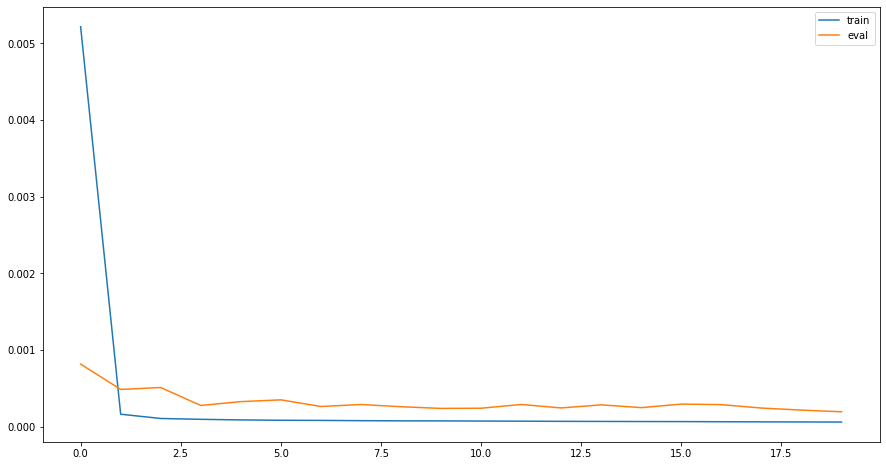

In [20]:
import matplotlib.pyplot as plt
# plot loss
plt.rcParams["figure.figsize"]=(15,8)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='eval')
pyplot.legend()
pyplot.show()

In [21]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)

#Encoder可以call back倒到特定層 超屌！
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 16)                144       
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8)                 0   

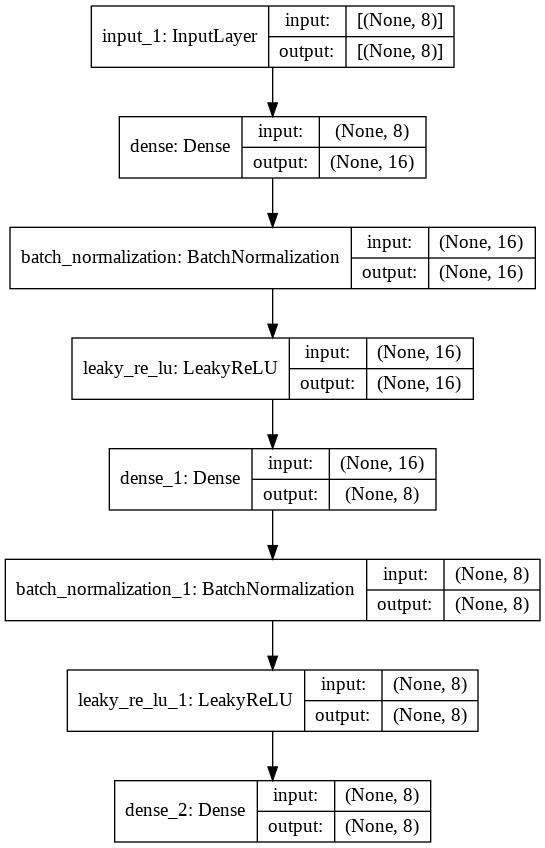

In [22]:
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
#encoder.save('/content/encoder.h5')

* PART 2: Extracting

In [23]:
# encode the train data
X_train_encode = encoder.predict(X_train)

In [24]:
print(np.array(train.iloc[0,:20]) )

[ 0.85384304 -0.70969333  0.14264851 -0.17695224  0.11758211 -0.15239452
  1.20767171  0.24573366  1.92451251  0.60162143 -0.43924958  0.58235219
 -0.70969333  0.05887841  0.22871568  0.08019633  0.18290679  0.0522131
  1.41968046  0.20409462]


In [25]:
train.shape

(1174461, 73)

In [26]:
tmp = pd.DataFrame(X_train_encode, columns = ['X_ec_'+str(i) for i in range(8)] )
train[['X_ec_'+str(i) for i in range(8)]] = tmp[['X_ec_'+str(i) for i in range(8)]]
del tmp 

In [27]:
# encode the test data
X_eval_encode = encoder.predict(X_eval)

In [28]:
tmp = pd.DataFrame(X_eval_encode, columns = ['X_ec_'+str(i) for i in range(8)] )
eval[['X_ec_'+str(i) for i in range(8)]] = tmp[['X_ec_'+str(i) for i in range(8)]]
del tmp

## Kmeans


In [29]:
#不抽樣的
train_0 = train[train['Y']!=0].reset_index(drop=True)
eval_0 = eval[eval['Y']!=0].reset_index(drop=True)

In [30]:
print(train_0.shape)
print(eval_0.shape)

(537417, 81)
(539909, 81)


In [31]:
#要抽樣的
train_1 = train[train['Y']==0].reset_index(drop=True)
eval_1 = eval[eval['Y']==0].reset_index(drop=True)

In [32]:
print(train_1.shape)
print(eval_1.shape)

(637044, 81)
(635393, 81)


In [33]:
import copy
from pandas.core.frame import DataFrame
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [34]:
#stratified sampling by Kmeans++
#Rescale independent variable & deal null problem before use it
def KMeans_stratified_sampling(data,k_col,K=0,Feat_decimal_mark=3,
                               elbow=False,elbow_K_range=range(1,10)):
    #initial
    tmp_kmeans_data = round(data[k_col],Feat_decimal_mark) #取小數第幾位
    #Elbow Method
    if elbow==True:
        distortions = []
        K = elbow_K_range
        for k in K:
            kmeanModel = KMeans(n_clusters=k).fit(tmp_kmeans_data)
            kmeanModel.fit(tmp_kmeans_data)
            distortions.append(sum(np.min(cdist(tmp_kmeans_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / tmp_kmeans_data.shape[0])
        ## Plot the elbow
        plt.rc('figure', figsize=(11.69,8.27))
        plt.plot(K, distortions, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Distortion')
        plt.title('The Elbow Method showing the optimal k')
        plt.show()
        return
    
    #Stratified Sampling
    K_det = K
    tmp_kmeans_array = tmp_kmeans_data.values
    K_func = KMeans(n_clusters=K_det,n_jobs=-1)
    K_func.fit(tmp_kmeans_array)
    K_dis=[]
    for i in range(len(tmp_kmeans_array)):
        K_dis.append(round(sum(abs(tmp_kmeans_array[i]- K_func.cluster_centers_[K_func.labels_[i]])),Feat_decimal_mark))
    
    unique, counts = np.unique(K_func.labels_, return_counts=True)
    K_dict = dict(zip(unique, counts))
    print(dict(zip(unique, counts)))
    data['K_Group'] = K_func.labels_
    data['K_Dis'] = K_dis 
    globals()['data_'+str(K)+'means'] = data
    globals()['K_dict'] = K_dict

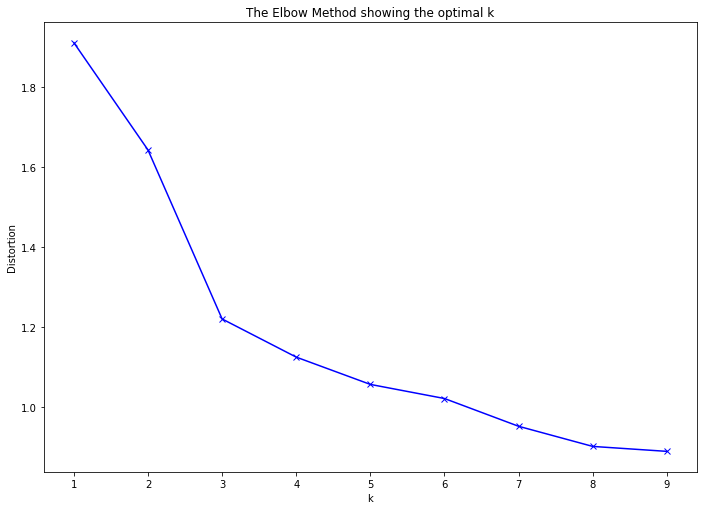

In [35]:
#Elbow test
KMeans_stratified_sampling(data=train_1,k_col=K_Featcol,elbow=True)

#optimize K might be 4!

Fit on train_1

In [36]:

#KMeans_stratified_sampling
KMeans_stratified_sampling(data=train_1,k_col=K_Featcol,
                           K=4,Feat_decimal_mark=3,
                           elbow=False,elbow_K_range=range(1,10))

{0: 270828, 1: 50507, 2: 15434, 3: 300275}


In [37]:
data_4means.head(3)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,...,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,Y,idx,Diff_cdf_idx,X_ec_0,X_ec_1,X_ec_2,X_ec_3,X_ec_4,X_ec_5,X_ec_6,X_ec_7,K_Group,K_Dis
0,0.760572,-0.029401,0.142649,-0.176952,0.117582,-0.152395,0.433292,0.068885,0.908483,1.140838,0.169367,0.254497,-0.029401,1.711484,0.228716,-4.202403,0.182907,0.052213,0.628468,0.031157,0.879010,0.331264,0.929147,0.171348,0.726897,0.381460,0.039037,-0.956034,-2.184735,-1.136086,1.092677,0.949307,0.841419,0.280544,-0.166573,-1.526949,1.058201,-0.194167,-0.548287,1.021428,...,1.067517,0.813870,-0.265283,0.032812,0.141379,-0.565776,0.456513,0.292513,0.632463,0.638465,0.609194,0.190231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,0,0.170291,0.0,-0.414369,-0.749635,0.542013,-0.193725,-0.529720,-1.492036,-0.368598,-0.070054,0,1.434
1,1.114048,-0.029401,0.142649,-0.172883,0.117582,-0.152395,0.060256,0.198770,0.098029,0.820122,0.571870,0.739117,-0.029401,0.058878,-1.474940,0.080196,0.182907,0.052213,0.774606,0.867697,0.227096,0.679825,0.545569,0.544764,0.829814,-1.420414,-0.952077,-0.363891,-1.038162,-1.536213,-0.962667,-0.288762,1.040046,1.068863,0.904152,0.948769,-1.318932,0.737631,0.406821,-0.381384,...,0.326036,0.629681,0.583660,0.714161,0.682618,0.173793,1.077650,-0.306626,0.818004,0.680814,0.609194,0.190231,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,0,0.255437,0.0,-0.432092,-0.810915,0.611797,-0.207472,-0.618315,-1.677307,-0.455530,-0.026408,0,1.395
2,0.448862,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.321162,0.342947,1.146333,1.163741,0.852008,1.281076,-0.029401,0.184633,0.228716,0.080196,-2.162819,0.052213,1.535638,0.299158,1.115922,-0.203592,0.956538,0.804656,1.032305,1.507128,0.348837,0.285040,1.042626,0.899544,1.714347,-0.059789,1.260279,0.232019,0.946753,0.426713,1.681515,0.264747,0.174775,0.575221,...,-0.121598,-0.309367,-0.777208,-0.720859,-0.860787,-1.136506,0.349136,1.196119,1.790523,0.648323,0.609194,0.190231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,0,0.340582,0.0,-0.437006,-0.844644,0.608785,-0.292836,-0.790966,-1.902980,-0.536684,-0.037118,0,1.498


In [38]:
#留多的兩個
data_4means_0 = data_4means[(data_4means['K_Group']==0 )|(data_4means['K_Group']==3 )]

In [39]:
print(data_4means_0.shape)

(571103, 83)


In [40]:
train_new = pd.concat([train_0,data_4means_0],axis=0, ignore_index=True)

In [41]:
del data_4means_0,train_0

Fit on train_1

In [42]:
#KMeans_stratified_sampling
KMeans_stratified_sampling(data=eval_1,k_col=K_Featcol,
                           K=4,Feat_decimal_mark=3,
                           elbow=False,elbow_K_range=range(1,10))

{0: 294805, 1: 327176, 2: 13, 3: 13399}


In [43]:
data_4means.head(3)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,...,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,Y,idx,Diff_cdf_idx,X_ec_0,X_ec_1,X_ec_2,X_ec_3,X_ec_4,X_ec_5,X_ec_6,X_ec_7,K_Group,K_Dis
0,0.096820,-0.029401,0.142649,-0.176952,0.117582,-0.152395,0.900423,-0.511266,0.159667,-0.132701,0.393363,0.107091,-0.029401,0.058878,0.228716,0.080196,-2.912135,0.052213,1.105753,-0.536167,0.133147,-1.701022,-0.442201,0.345821,1.462970,1.273196,0.127549,0.266551,0.249713,-1.040861,0.000722,0.411637,0.263494,-0.824257,-1.417589,-0.451732,-0.770524,0.194148,0.153417,0.808019,...,0.824088,0.696256,-0.971367,-1.415861,-1.441722,0.376171,0.349136,0.040139,-0.174927,2.105745,4.129956,0.151671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.960784,0.0,0.0,0.336591,0.264297,0.315789,0.026261,0,0.255254,0.0,-0.179556,-0.724522,0.555925,-0.002274,-0.772054,-3.184625,-0.535996,-0.229181,0,5.045
1,0.096820,1.150617,0.142649,-0.176952,0.117582,-0.152395,-2.559886,0.032492,-0.380696,0.576335,0.133091,0.235318,1.150617,0.058878,0.228716,0.080196,0.182907,0.052213,0.460679,-0.173573,-0.773915,-1.962196,0.405808,0.104358,1.317456,0.702276,0.582289,-0.144236,0.459928,0.169737,-0.980651,0.505975,-2.121099,-0.768057,-0.109644,-0.140498,-0.413365,0.823096,0.477986,0.345308,...,0.410019,0.234985,-1.617089,-1.586052,-1.595558,-0.242018,1.559124,-0.809165,0.095859,2.279910,4.129956,0.151671,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.960784,0.0,0.0,0.336591,0.264297,0.315789,0.026261,0,0.340338,0.0,-0.186567,-0.730845,0.607470,0.079593,-0.648571,-3.071321,-0.509312,-0.187495,0,5.442
2,0.900192,4.057230,0.142649,-0.176952,0.117582,-0.152395,-1.321714,0.768465,0.511382,0.878791,-0.301191,1.102633,4.057230,-0.713285,0.228716,0.080196,0.182907,0.052213,1.033338,0.699962,0.443281,-0.512061,0.767546,-0.298538,1.550979,0.368021,-1.173365,-1.566665,-1.272993,-0.779947,-0.466409,0.949307,-0.316456,-1.040539,0.904152,-2.124696,-0.622290,0.552514,0.306585,0.953530,...,0.837062,0.524823,-0.626905,-0.304555,-0.583899,0.221746,1.631912,0.054224,0.963396,2.576037,4.129956,0.151671,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.960784,0.0,0.0,0.336591,0.264297,0.315789,0.026261,0,0.510508,0.0,-0.206254,-0.810387,0.669668,0.008441,-0.848458,-3.396564,-0.644973,-0.154642,0,5.749


In [44]:
#留多的兩個
data_4means_0 = data_4means[(data_4means['K_Group']==0 )|(data_4means['K_Group']==1 )]

In [45]:
print(data_4means_0.shape)

(621981, 83)


In [46]:
eval_new = pd.concat([eval_0,data_4means_0],axis=0, ignore_index=True)

In [47]:
del data_4means_0,eval_0

In [48]:
del eval_1,train_1,train,eval

In [50]:
import gc
gc.collect()

88

# 直接硬train會怎樣


In [51]:
!git clone --recursive https://github.com/Microsoft/LightGBM
%cd /content/LightGBM
!mkdir build
!cmake -DUSE_GPU=1
!make -j$(nproc)
!sudo apt-get -y install python-pip
%cd /content/LightGBM/python-package
!sudo python setup.py install --precompile

Cloning into 'LightGBM'...
remote: Enumerating objects: 22737, done.
remote: Counting objects: 100% (418/418), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 22737 (delta 229), reused 323 (delta 177), pack-reused 22319
Receiving objects: 100% (22737/22737), 17.73 MiB | 27.47 MiB/s, done.
Resolving deltas: 100% (16626/16626), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21731, done.        
remote: Counting objects: 100% (3/3), done.        
remote: Co

In [52]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [53]:
train_new.head(3)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,...,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,Y,idx,Diff_cdf_idx,X_ec_0,X_ec_1,X_ec_2,X_ec_3,X_ec_4,X_ec_5,X_ec_6,X_ec_7,K_Group,K_Dis
0,0.853843,-0.709693,0.142649,-0.176952,0.117582,-0.152395,1.207672,0.245734,1.924513,0.601621,-0.439250,0.582352,-0.709693,0.058878,0.228716,0.080196,0.182907,0.052213,1.419680,0.204095,1.891033,0.491307,0.284242,-0.393284,0.746444,0.706549,0.869002,1.237137,0.995521,0.993360,1.363493,-0.201711,0.704825,0.661752,0.679638,1.089863,1.315128,-0.980191,-1.059645,-0.112974,...,-0.072508,-0.434420,0.372723,0.719581,0.543409,0.170987,0.349136,1.943812,0.138223,0.555792,0.609194,0.190231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,1,0.000000,0.0,-0.414275,-0.751241,0.539057,-0.203073,-0.546355,-1.511183,-0.374724,-0.072922,NaN,NaN
1,1.128771,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.001865,1.037051,0.440938,0.447094,0.947879,0.196005,-0.029401,0.058878,0.228716,-3.181323,0.182907,0.052213,1.209400,0.977915,0.413308,0.963050,0.099428,0.893599,0.974448,1.458270,1.283931,0.684938,0.694759,1.255584,1.133564,0.861499,1.148253,0.205993,-0.043276,0.963712,0.555411,-0.728998,-0.749459,0.734531,...,0.419639,0.355975,0.946573,0.685234,0.814245,0.398241,0.349136,0.844309,0.576239,0.610637,0.609194,0.190231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,1,0.085146,0.0,-0.432405,-0.825739,0.594672,-0.274668,-0.741457,-1.823681,-0.503904,-0.044364,NaN,NaN
2,0.508191,-0.029401,0.142649,-0.176952,0.117582,-0.152395,0.018900,-0.117963,0.015354,0.143816,-1.591742,0.767786,-0.029401,0.058878,0.228716,0.080196,-1.223046,0.052213,-2.115845,-0.557607,-0.168126,0.379000,-1.551185,0.741919,-0.904976,-0.161889,0.370369,1.156929,0.318626,1.064581,-0.386672,0.147871,0.305882,1.068863,0.904152,0.457248,1.058201,0.181213,0.348232,-0.375904,...,0.117733,0.266216,-1.344319,-1.565072,-1.683062,-1.537683,-1.020850,-0.486933,-0.044890,0.385113,0.609194,0.190231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352,0.393182,0.055556,2,0.425728,0.0,-0.119577,1.206790,-0.296584,-0.730883,1.099486,1.500196,0.826307,-0.671296,NaN,NaN


In [54]:
eval_new.head(3)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,...,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,Y,idx,Diff_cdf_idx,X_ec_0,X_ec_1,X_ec_2,X_ec_3,X_ec_4,X_ec_5,X_ec_6,X_ec_7,K_Group,K_Dis
0,-0.163385,1.728609,0.142649,-0.176952,0.117582,-0.152395,0.367092,0.396664,-0.568763,-0.659308,-1.460349,-1.277176,1.728609,0.058878,0.228716,0.080196,0.182907,0.052213,0.560829,0.351688,-0.592410,-2.147502,-1.072024,-1.373925,1.328402,0.773860,0.354308,-0.353238,0.826510,-0.406675,-0.980651,0.298315,-0.644835,-1.040539,-0.342384,-1.055419,-1.188373,-1.468080,-1.755555,0.065633,...,0.151821,0.545479,-0.901711,-0.777216,-0.750277,-2.998966,0.349136,-0.320419,-1.283056,3.540881,4.129956,0.151671,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.960784,0.0,0.0,0.336591,0.264297,0.315789,0.026261,1,0.000000,0.0,-0.168856,-0.680553,0.523101,0.039982,-0.656904,-3.000189,-0.459754,-0.246036,NaN,NaN
1,-0.055390,1.519337,0.142649,-0.176952,0.117582,-0.152395,0.625994,-0.385464,-1.628485,0.106094,0.769114,-0.539004,1.519337,0.058878,0.228716,0.080196,0.182907,0.052213,0.825359,-0.413147,-1.647954,-1.962196,-0.156601,0.694417,0.957313,0.813600,0.422047,-0.755981,0.571840,0.627638,0.461960,0.231801,-0.644835,1.068863,-1.034593,-1.362928,-1.545531,0.855117,0.790379,0.346429,...,0.086763,0.722958,-1.428631,-1.967404,-1.813329,-0.242018,0.349136,-0.571870,0.004159,1.815301,4.129956,0.151671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.960784,0.0,0.0,0.336591,0.264297,0.315789,0.026261,1,0.085085,0.0,-0.139347,-0.559303,0.432584,0.156507,-0.339364,-2.491580,-0.249507,-0.292515,NaN,NaN
2,-0.163385,1.519337,0.142649,-0.176952,0.117582,-0.152395,0.423988,0.171544,-0.373376,0.901865,-0.557337,0.289089,1.519337,0.058878,0.228716,0.080196,0.182907,0.052213,0.618962,0.131545,-0.397794,-2.147502,0.795142,-0.536173,1.066405,0.629312,-0.153364,-0.107050,-0.972231,-0.220350,-1.344064,0.053433,0.529420,1.068863,-1.417589,-1.743812,1.058201,0.749375,0.648170,0.949950,...,0.910214,0.870741,-2.323477,-2.121811,-2.128943,-0.175742,0.349136,-0.342998,0.241700,1.923077,4.129956,0.151671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.960784,0.0,0.0,0.336591,0.264297,0.315789,0.026261,1,0.170169,0.0,-0.148022,-0.594948,0.459194,0.122252,-0.432713,-2.641100,-0.311315,-0.278851,NaN,NaN


In [55]:
train_new.columns

Index(['X_0', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9',
       'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18',
       'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27',
       'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36',
       'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45',
       'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54',
       'X_55', 'X_56', 'X_57', 'X_58', 'X_59', 'X_60', 'X_61', 'X_62', 'X_63',
       'X_64', 'X_65', 'X_66', 'X_67', 'X_68', 'X_69', 'Y', 'idx',
       'Diff_cdf_idx', 'X_ec_0', 'X_ec_1', 'X_ec_2', 'X_ec_3', 'X_ec_4',
       'X_ec_5', 'X_ec_6', 'X_ec_7', 'K_Group', 'K_Dis'],
      dtype='object')

In [56]:
d_train=lgb.Dataset(train_new.drop(['Y'], axis=1), label=train_new['Y'])
d_val=lgb.Dataset(eval_new.drop(['Y'], axis=1), label=eval_new['Y'])

In [57]:
params={}
params['learning_rate']=0.03#0.05
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature ->default:regression
params['metric']='multi_logloss'#params['metric']='binary' #metric for multi-class
params['max_depth']=60
params['num_boost_round']=1000
params['feature_fraction'] = 0.95 # sub_row
params['bagging_fraction'] = 0.95 # sub_row
params['bagging_freq'] = 20
params['num_leaves'] = 100        # num_leaf
params['min_data'] = 300         # min_data_in_leaf
params['device'] = 'gpu'         # min_data_in_leaf
params['num_class']=3 #no.of unique values in the target class not inclusive of the end value
watchlist = [d_val]

In [58]:
clfer = lgb.train(params, d_train,d_val,watchlist, early_stopping_rounds=50)

/content/LightGBM/python-package/lightgbm/engine.py:154: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 19122
[LightGBM] [Info] Number of data points in the train set: 1108520, number of used features: 82
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 77 dense feature groups (84.57 MB) transferred to GPU in 0.109725 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -0.663211
[LightGBM] [Info] Start training from score -1.461915
[LightGBM] [Info] Start training from score -1.374311
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 77 dense feature groups (80.33 MB) transferred to GPU in 0.110572 secs. 1 sparse feature groups
[1]	valid_0's multi_logloss: 0.954752
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_logloss: 0.902082
[3]	valid_0's multi_lo

### Evaluate Model Performance

In [59]:
val_pred_prob = clfer.predict(eval_new.drop(['Y'], axis=1))

In [60]:
import numpy as np
val_pred = [np.argmax(x) for x in val_pred_prob]

In [61]:
val_pred = np.array(val_pred)

In [62]:
metrics.matthews_corrcoef(eval_new['Y'], val_pred)

0.9998890054080128

In [63]:
pre = metrics.precision_score(eval_new['Y'], val_pred,average='micro')
re = metrics.recall_score(eval_new['Y'], val_pred,average='micro')
f1 = metrics.f1_score(eval_new['Y'], val_pred,average='micro')
print('pre:',pre,'\n' 
      're:',re,'\n' 
      'f1:', f1)

pre: 0.9999328679995525 
re: 0.9999328679995525 
f1: 0.9999328679995525


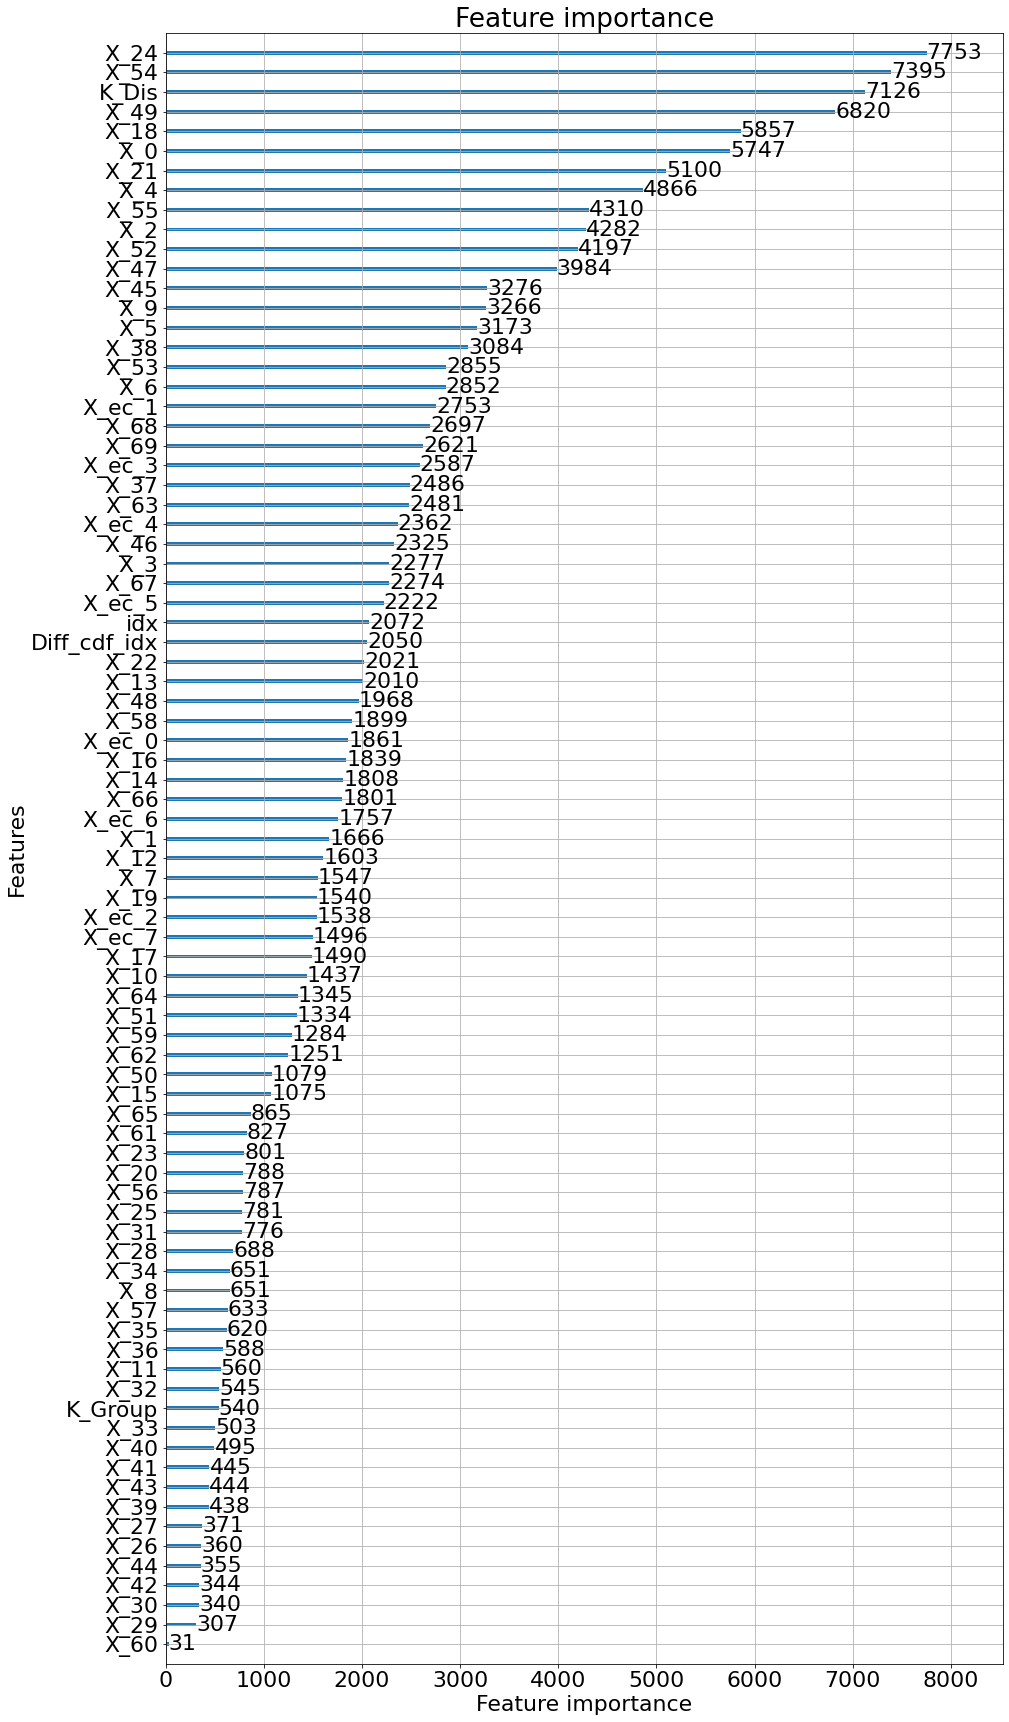

In [64]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(15,30)
plt.rcParams.update({"font.size":22})
lgb.plot_importance(clfer)

# DarkZone

In [65]:
import copy
from collections import deque
from pandas.core.frame import DataFrame
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [66]:
def plot_feature_distribution(df0,df1, df2, label0,label1, label2, features,plot_rows,plot_cols):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(1,1,figsize=(30,10))

    for feature in features:
        i += 1
        plt.subplot(plot_rows,plot_cols,i)
        sns.distplot(df0[feature], hist=False,label=label0)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=20)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

In [67]:
df_0 = train_new[train_new['Y']==0]
df_0['idx'] = df_0.index

df_1 = train_new[train_new['Y']==1]
df_1['idx'] = df_1.index

df_2 = train_new[train_new['Y']==2]
df_2['idx'] = df_2.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 1080x2160 with 0 Axes>

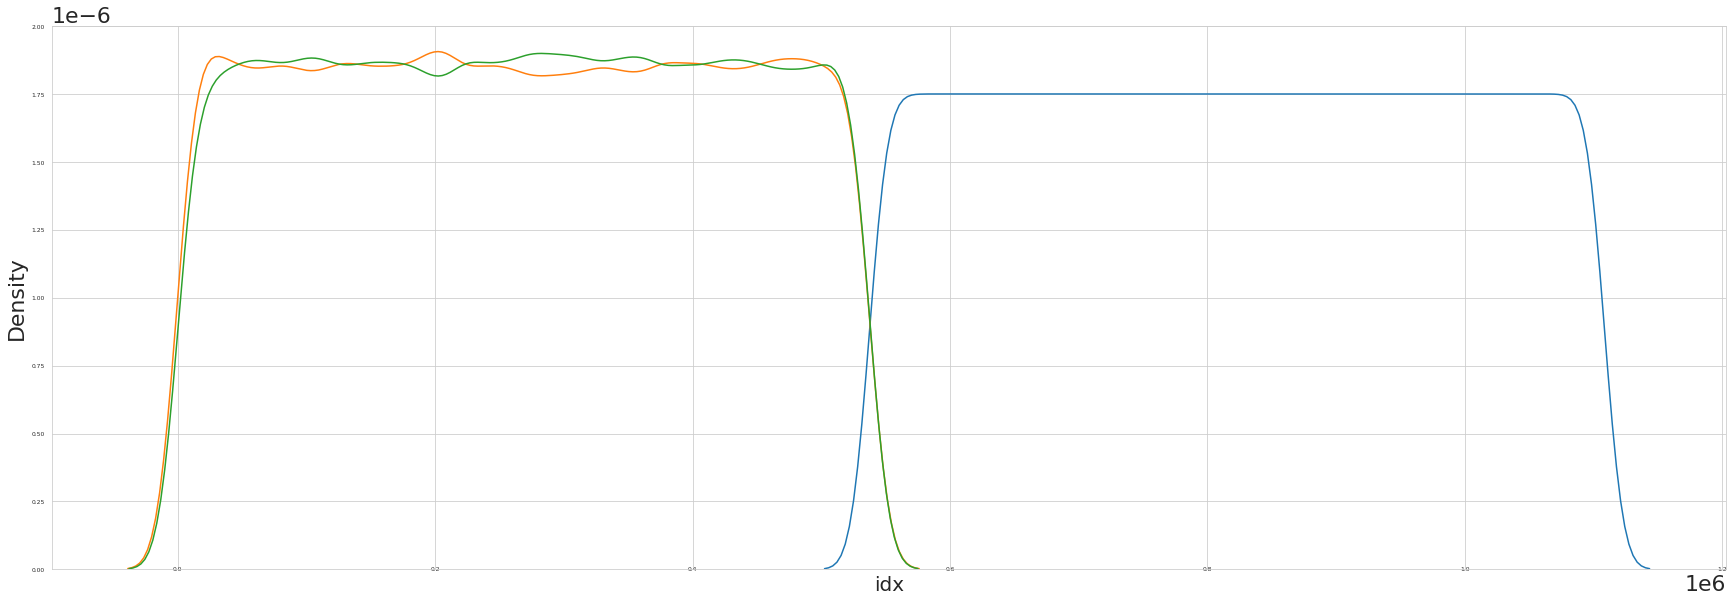

In [68]:
plot_feature_distribution(df_0, df_1,df_2, '0', '1','2', ['idx'],1,1)

In [69]:
df_0 = eval_new[eval_new['Y']==0]
df_0['idx'] = df_0.index

df_1 = eval_new[eval_new['Y']==1]
df_1['idx'] = df_1.index

df_2 = eval_new[eval_new['Y']==2]
df_2['idx'] = df_2.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 1080x2160 with 0 Axes>

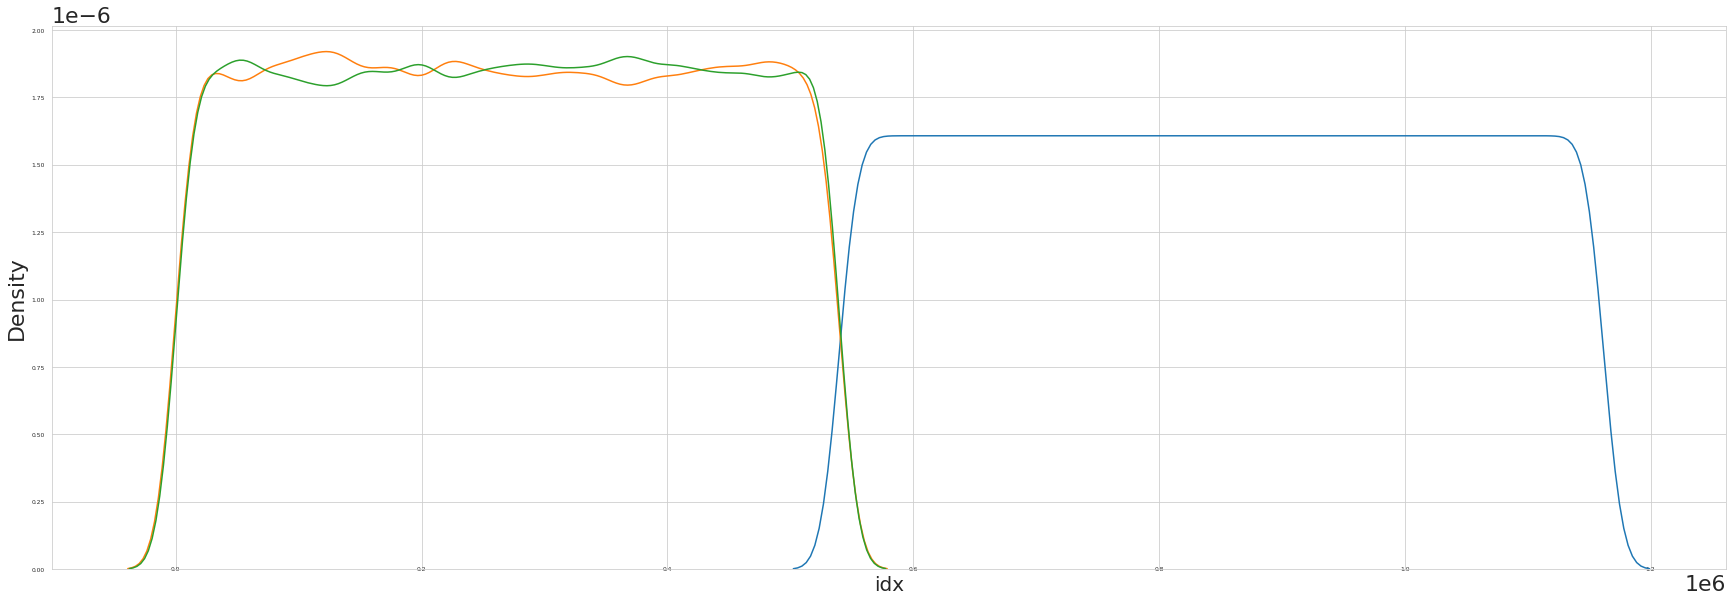

In [70]:
plot_feature_distribution(df_0, df_1,df_2, '0', '1','2', ['idx'],1,1)